In [1]:
from DataLoader import getdata

In [2]:
Train, Test = getdata()

Going through data, please be patient perhaps go make some tea it will take 5-10 mins to load up
## Sanity check
Printing unique counts of each digit
{0.0: 6516, 1.0: 6351, 2.0: 6495, 3.0: 6618, 4.0: 6349, 5.0: 6571, 6.0: 6523, 7.0: 6337, 8.0: 6552, 9.0: 6563, -1.0: 159}


In [17]:
print(Train.shape)
print(Test.shape)
print(Train[0,0])

(48750, 3698)
(16284, 3698)
264.0


## Neural net simple

In [54]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np

# Generate dummy data

#Processing for 11 classification 
# y_train = Train[:,-1]
# x_train = Train[:,1:-1]
# Train[np.where(Train[:,-1]==-1),-1] = 10
# y_test = Test[:,-1]
# x_test = Test[:,1:-1]
# Test[np.where(Test[:,-1]==-1),-1] = 10


#Process for 10 classification
y_train = Train[Train[:,-1]>-1,-1]
x_train = Train[Train[:,-1]>-1,1:-1]
y_train = Train[Train[:,-1]<10,-1]
x_train = Train[Train[:,-1]<10,1:-1]
y_test = Test[Test[:,-1]>-1,-1]
x_test = Test[Test[:,-1]>-1,1:-1]
y_test = Test[Test[:,-1]<10,-1]
x_test = Test[Test[:,-1]<10,1:-1]


Trainnonzero = np.nonzero(x_train)
Testnonzero = np.nonzero(x_test)
x_train[Trainnonzero[0],Trainnonzero[1]] = (x_train[Trainnonzero[0],Trainnonzero[1]] - 4000)/(1000000-4000)
x_test[Testnonzero[0],Testnonzero[1]] = (x_test[Testnonzero[0],Testnonzero[1]] - 4000)/(1000000-4000)

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
model.add(Dense(64, activation='relu', input_dim=50))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128,verbose=1)

Epoch 1/20
48631/48631 [==============================] - 1s 28us/step - loss: 2.3026 - acc: 0.1022
Epoch 2/20
48631/48631 [==============================] - 1s 14us/step - loss: 2.3025 - acc: 0.1022
Epoch 3/20
48631/48631 [==============================] - 1s 14us/step - loss: 2.3025 - acc: 0.1018
Epoch 4/20
48631/48631 [==============================] - 1s 15us/step - loss: 2.3025 - acc: 0.1009
Epoch 5/20
48631/48631 [==============================] - 1s 14us/step - loss: 2.3025 - acc: 0.1013
Epoch 6/20
48631/48631 [==============================] - 1s 14us/step - loss: 2.3025 - acc: 0.1009
Epoch 7/20
48631/48631 [==============================] - 1s 14us/step - loss: 2.3025 - acc: 0.1028
Epoch 8/20
48631/48631 [==============================] - 1s 14us/step - loss: 2.3025 - acc: 0.1016
Epoch 9/20
48631/48631 [==============================] - 1s 14us/step - loss: 2.3025 - acc: 0.1022
Epoch 10/20
48631/48631 [==============================] - 1s 14us/step - loss: 2.3025 - acc: 0.1026

# SVM

In [55]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(x_train, y_train) 
for discrete_train_predict in clf.predict(x_test):
    print(accuracy_score(discrete_train_predict, y_test))
    

TypeError: Singleton array 3.0 cannot be considered a valid collection.

## LSTM

In [64]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
# Generate dummy data
import numpy as np
y_train = Train[Train[:,-1]>-1,-1]
x_train = Train[Train[:,-1]>-1,1:-1]
y_train = Train[Train[:,-1]<10,-1]
x_train = Train[Train[:,-1]<10,1:-1]
y_test = Test[Test[:,-1]>-1,-1]
x_test = Test[Test[:,-1]>-1,1:-1]
y_test = Test[Test[:,-1]<10,-1]
x_test = Test[Test[:,-1]<10,1:-1]


Trainnonzero = np.nonzero(x_train)
Testnonzero = np.nonzero(x_test)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = x_train.reshape(x_train.shape[0],264,-1)
x_test = x_test.reshape(x_test.shape[0],264,-1)

model = Sequential()
model.add(LSTM(256,input_shape=[x_train.shape[1],x_train.shape[2]],recurrent_dropout=0.5))

model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
print(x_train.shape,y_train.shape)
model.fit(x_train, y_train, batch_size=64, epochs=2)
score = model.evaluate(x_test, y_test, batch_size=64)

((48631, 264, 14), (48631,))
Epoch 1/2
14656/48631 [========>.....................] - ETA: 4:47 - loss: 2.3090 - acc: 0.0980

KeyboardInterrupt: 

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
import numpy as np
y_train = Train[Train[:,-1]>-1,-1]
x_train = Train[Train[:,-1]>-1,1:-1]
y_train = Train[Train[:,-1]<10,-1]
x_train = Train[Train[:,-1]<10,1:-1]
y_test = Test[Test[:,-1]>-1,-1]
x_test = Test[Test[:,-1]>-1,1:-1]
y_test = Test[Test[:,-1]<10,-1]
x_test = Test[Test[:,-1]<10,1:-1]


Trainnonzero = np.nonzero(x_train)
Testnonzero = np.nonzero(x_test)
x_train[Trainnonzero[0],Trainnonzero[1]] = (x_train[Trainnonzero[0],Trainnonzero[1]] - 4000)/(1000000-4000)
x_test[Testnonzero[0],Testnonzero[1]] = (x_test[Testnonzero[0],Testnonzero[1]] - 4000)/(1000000-4000)

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=[Train.shape[1]-2,1]))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(11, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(np.reshape(x_train,[x_train.shape[0],x_train.shape[1],1]), y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

Epoch 1/10
 4448/48750 [=>............................] - ETA: 50:12 - loss: 10.8331 - acc: 0.0960

KeyboardInterrupt: 

## Adaboost now with sklearn

In [40]:
Trainnonzero = np.nonzero(Train)
Testnonzero = np.nonzero(Test)

In [39]:
Trainnonzero[0]
Trainnonzero[1]

array([   0,    1,    2, ..., 3695, 3696, 3697])

In [65]:
from sklearn.externals.six.moves import zip

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
# y_train = Train[:,-1]
# x_train = Train[:,1:-1]
# Train[np.where(Train[:,-1]==-1),-1] = 10

# y_test = Test[:,-1]
# x_test = Test[:,1:-1]
# Test[np.where(Test[:,-1]==-1),-1] = 10

y_train = Train[Train[:,-1]>-1,-1]
x_train = Train[Train[:,-1]>-1,1:-1]
y_train = Train[Train[:,-1]<10,-1]
x_train = Train[Train[:,-1]<10,1:-1]
y_test = Test[Test[:,-1]>-1,-1]
x_test = Test[Test[:,-1]>-1,1:-1]
y_test = Test[Test[:,-1]<10,-1]
x_test = Test[Test[:,-1]<10,1:-1]

Trainnonzero = np.nonzero(x_train)
Testnonzero = np.nonzero(x_test)
x_train[Trainnonzero[0],Trainnonzero[1]] = (x_train[Trainnonzero[0],Trainnonzero[1]] - 4000)/(1000000-4000)
x_test[Testnonzero[0],Testnonzero[1]] = (x_test[Testnonzero[0],Testnonzero[1]] - 4000)/(1000000-4000)

discrete_test_errors = []
bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=10,
    learning_rate=1.5,
    algorithm="SAMME.R")
print('fiting')
bdt_discrete.fit(x_train, y_train)

for discrete_train_predict in bdt_discrete.staged_predict(x_test):
    print(accuracy_score(discrete_train_predict, y_test))
    discrete_test_errors.append(accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]


fiting
0.244669590201119
0.24451837290185996
0.24527445939815515
0.2476939361862997
0.248903674580372
0.2472402842885226
0.2472402842885226
0.2467866323907455
0.24648419779222744
0.24693784969000454


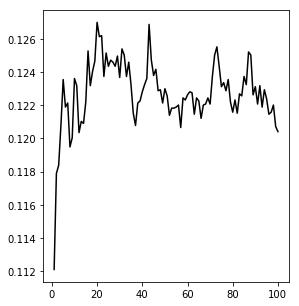

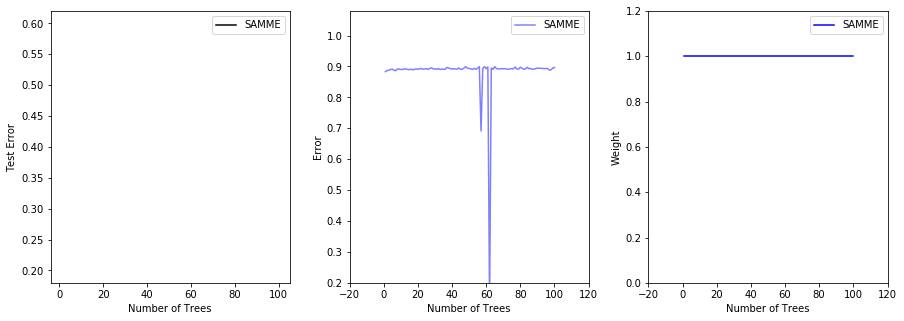

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim(.2,discrete_estimator_errors.max()*1.2)
plt.xlim(-20, len(bdt_discrete) + 20)

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()